# Deep Learning with Arefin

## Intro

###Deep Learning Basic

Congratulations on completing your journey through Machine Learning! As we move forward, we'll dive into the world of Deep Learning, where we'll explore neural networks, deep architectures, and advanced techniques that power today's most sophisticated AI systems.

Let's begin our exploration of Deep Learning.

**Deep Learning:** a subset of ML that learns from Artificial Neural Network

So what is a Artificial Neural Network??

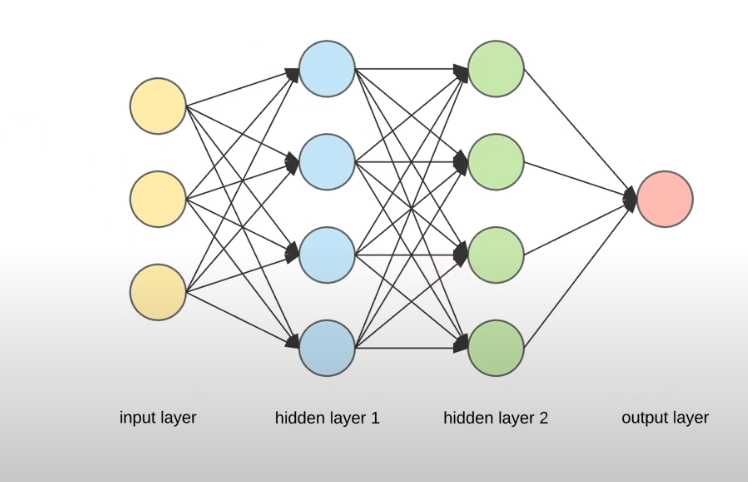

Here you can see the input and output layers are connected. In our body, everything is connected by neurons.

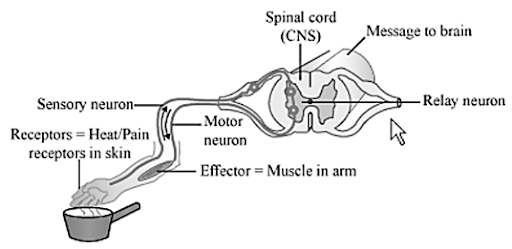

**Perception:** a basic artificial Neuron that takes input , applies weight, combines them and produces an output using an activation function.

It is used for task like binary classification and is the building block of neural network.

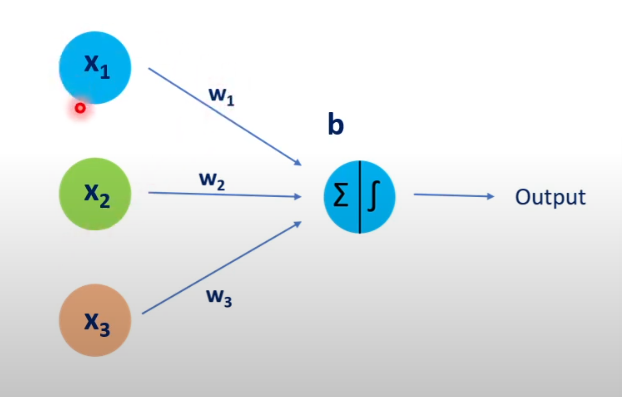

Factors contributing in a perception is
- Inputs (x1, x2, x3)
- Weights (w1,w2,w3)
- Bias (b)
- Weighted sum (x1w1 + x2w2 + ...) +b == z
- Activation Function (fn(z))
- Output

Limitations of perception:
- Linear Seprabillity
- Binary Classification
- Lack of complexity (Hidden layer complexity)
- Lack of generalization
- Sensitivty to initial weights

By combining Several perceptron, we will get a Neural Network

Imagine we have a image data. after running throught he input layer it will enter the hidden layers. The output of a layer will be the input for the next layers

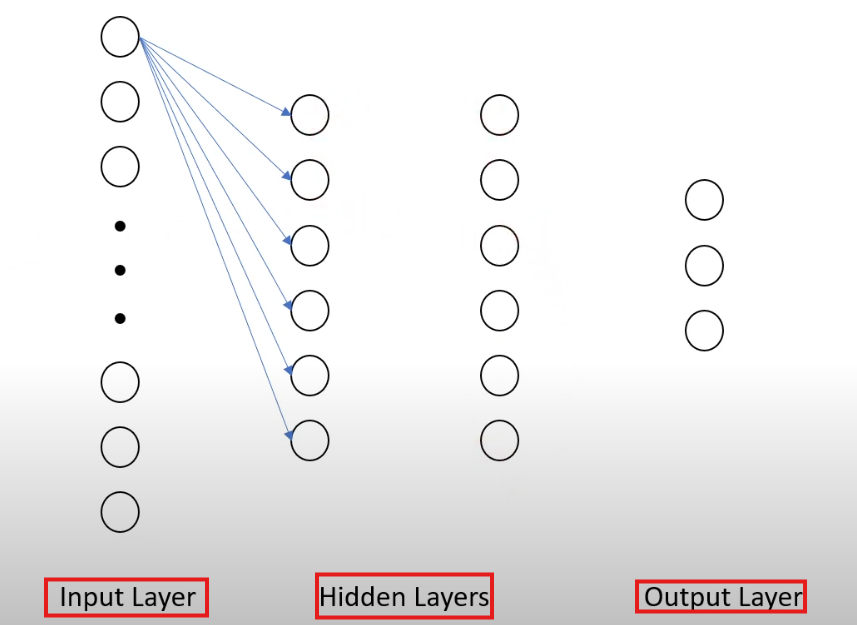

Here input is the heat, and after traveling through the neurons in your body, it produce a output where you say "Ouch" and remove your hand from the heat source.

Just like that an Artificial Neural Network take some input as image, text etc and produce results after going through the nueral layers

### Forward and Backward Propagation

Let's say we have a picture of this smol dog.

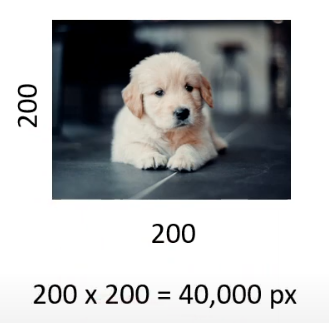

It have Dimension of 200 x 200 means 40,000 pixels. So we will have 40k data points in the input layer


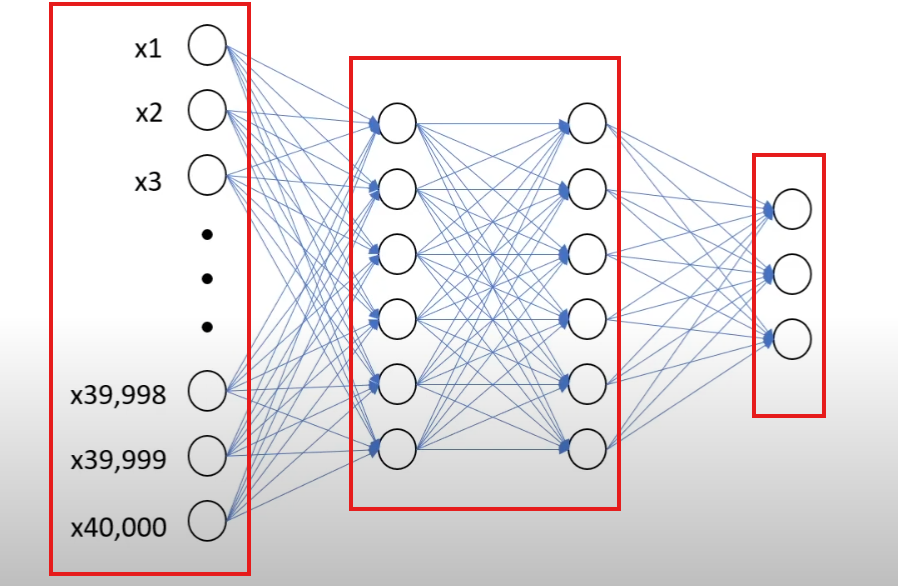

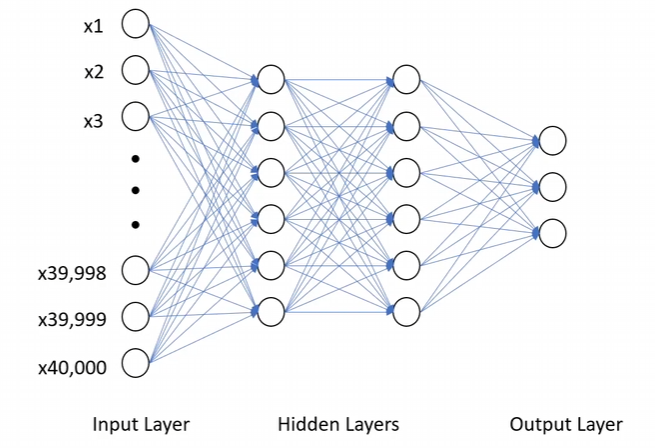

Those 40 thousand data points will be the input for the hiddne layers like this.

Each Neuron in the first hideen layer gets 40 thousand input. But how do we get these input values?

In the Input layer the value will be pixel intensity value as we areworking with an image. the value for each data point will be between 0 to 255.

We take each of these pixel intensity value and put them in this formula --

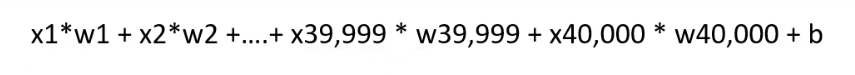

in this we randomly generate some weight and bias value for calculation.

Then we run it through a activation function-

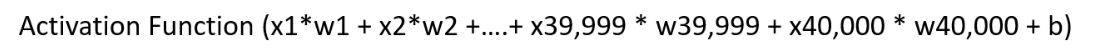



The activation function can be sigmoid, rectified linear unit etc.

When it is sigmoid the activation function will give a value between 0 to 1 in the hidden layer input.

Here are some of them --

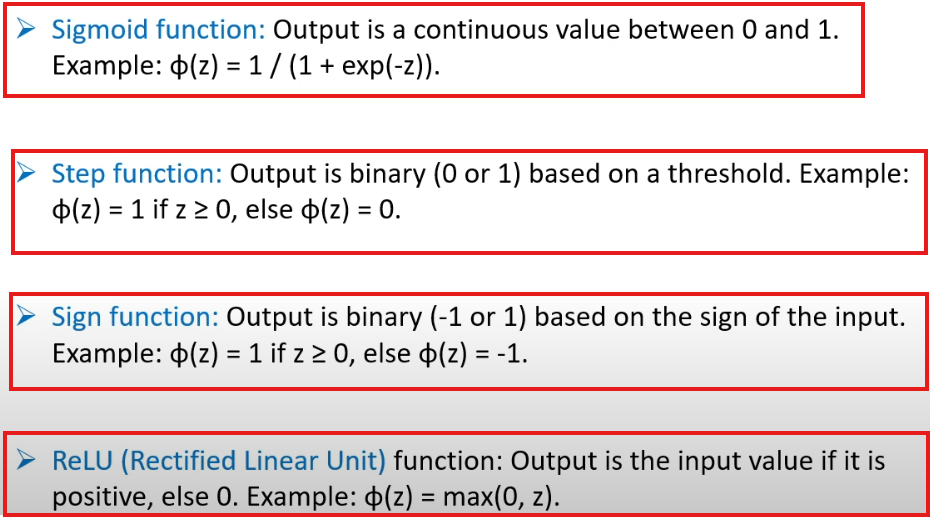

By doing this, we will get some output layers that will help us idnetify different iamges.

This goes on and on until the output layer and this is called **Forward Propagation**

The images / data will be lebeled as we are talking about supervised learning. After doing forward propagation it will make some prediction and test with the lebeled data. After making the prediction it will auto matically adjust the Weight and bias for next one.
This is called **Backward Propagation**

There is also convolutional neural network later.

### Building a Perceptron From scratch

In [1]:
import numpy as np

In [41]:
class SigmoidPerception():

  def __init__(self, input_size):
    self.weights = np.random.random(input_size)
    self.bias = np.random.random(1)


  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))


  def prediction(self, inputs):
    weighted_sum = np.dot(inputs, self.weights) + self.bias
    return self.sigmoid(weighted_sum)


  def fit(self, inputs, targets, learning_rate, num_epochs):
    num_examples = inputs.shape[0]

    for epoch in range(num_epochs):
      for i in range(num_examples):
        input_vector = inputs[i]
        target = targets[i]

        prediction = self.prediction(input_vector)
        error = target - prediction

        gredient_weights = error * prediction * (1 - prediction) * input_vector
        gredient_bias = error * prediction * (1 - prediction)


  def evaluate(self, inputs, targets):
    correct = 0

    for input_vector, target in zip(inputs, targets):
      prediction = self.prediction(input_vector)
      if prediction >= 0.5:
        predicted_class = 1
      else:
        predicted_class = 0

        if predicted_class == target:
          correct += 1

    accuracy = correct / len(inputs)
    return accuracy


In [2]:
list_1 = [1, 2, 3, 4, 5]
list_2 = [2, 4, 6, 8, 10]

for val1,val2 in zip(list_1, list_2):
  print(val1, val2)

1 2
2 4
3 6
4 8
5 10


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/content/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df['Outcome'].value_counts()

,count
Outcome,
0,268
1,268


In [25]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
364,4,147,74,25,293,34.9,0.385,30
615,3,106,72,0,0,25.8,0.207,27
379,0,93,100,39,72,43.4,1.021,35
462,8,74,70,40,49,35.3,0.705,39
41,7,133,84,0,0,40.2,0.696,37
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
759,6,190,92,0,0,35.5,0.278,66
761,9,170,74,31,0,44.0,0.403,43


In [28]:
# From pandas dataFrame to numpy array
X = X.values
Y = Y.values

In [29]:
type(X)

numpy.ndarray

In [30]:
X

array([[  4.   , 147.   ,  74.   , ...,  34.9  ,   0.385,  30.   ],
       [  3.   , 106.   ,  72.   , ...,  25.8  ,   0.207,  27.   ],
       [  0.   ,  93.   , 100.   , ...,  43.4  ,   1.021,  35.   ],
       ...,
       [  6.   , 190.   ,  92.   , ...,  35.5  ,   0.278,  66.   ],
       [  9.   , 170.   ,  74.   , ...,  44.   ,   0.403,  43.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ]])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [33]:
X_test_scaled.shape[1]

8

In [42]:
# Sigmoid Perceptron
perceptron = SigmoidPerception(input_size=X_train_scaled.shape[1])

In [51]:
perceptron.fit(inputs=X_train_scaled, targets=Y_train, learning_rate=0.1, num_epochs=100)

In [52]:
# Model Evaluation
accuracy = perceptron.evaluate(inputs=X_test_scaled, targets=Y_test)
print(f"Accuracy: ", 100-accuracy*100 )

Accuracy:  68.51851851851852


### Neural Network Types

There are various Neural network for different tasks.

- Convolutional Neural Network (CNN) -- for computer vision

- Recurrent Neural Network (RNN) -- for Natural language processing (NLP)

- Generative Adversarial Network (GAN) -- for image, video generation

There are a lot more that we will learn in Deep Learning

### Deep Learning Libraries

Now about the library we can use for Deep learning --

- TensorFlow -- Developed by google

- PyTorch -- Developed by Facebook

- Microsoft Cognitive Toolkit (CNTK)

- Keras -- Not a stand-alone liabrary. Has TensorFlow and CNTK as it's backend.

There are many more library out there but in here we will mainly use TensorFlow and Keras

### Random

## Projects